Author: Ahmed Sobhi

Creation_date: 16th June 2023

Objective: Data EDA.

## Importing Required libararies and packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# For iteration visulization purpose
from tqdm import tqdm

## Required Functions

In [51]:
def plot_timeseries_trend(df:pd.DataFrame, timestamp_col:str, target_col:str, groupby_lst:list, fig_title:str='', save:bool=False)->None:
    """
        Plot price trend per input selected feature

        Input:
            df: pandas DataFrame, input dataset.
            timestamp_col: str, timestamp feature which will be x-axis.
            target_col: str, target featuers, which will be y-axis
            groupby_col: list, features which the dataset will be grouped by.
            fig_title: str, title of the plot
            save: boolean, indicate whether save or not to save the plot.

        Output:
            None.
    """

    # Create a copy of input dataframe
    _df = df.copy()

    # Group the data by category
    grouped_data = _df.sort_values(timestamp_col, ascending=True).groupby(groupby_lst)

    # Determine the number of categories
    num_categories = len(grouped_data)

    # Calculate the number of rows and columns for subplots
    num_rows = int(num_categories / 2) + num_categories % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axes array to easily iterate through subplots
    axes = axes.flatten()

    # Plotting the trend for each category
    for i, (category, group) in enumerate(grouped_data):
        ax = axes[i]  # Select the appropriate subplot
        ax.plot(group[timestamp_col], group[target_col])
        ax.set_title(category)
        ax.set_xlabel('Time')
        ax.set_ylabel(target_col)

    # Hide empty subplots if necessary
    if num_categories < num_rows * num_cols:
        for j in range(num_categories, num_rows * num_cols):
            fig.delaxes(axes[j])
    
    plt.suptitle(fig_title)
    plt.tight_layout()  # Adjust the spacing between subplots
    
    if save==True:
        plt.savefig(f'../report/plots/{fig_title.replace(" ", "_")}.jpg')
    
    plt.show()

    return None


## Loading Dataset

In [9]:
# Loading dataset
df = (
    pd.read_csv('../data/intermid/DS-task-data-cleaned.csv')
    .assign(
        priced_at= lambda x: pd.to_datetime(x.priced_at)
    )
)

# Load extra_features dataset
df_extrafeatures = pd.read_csv('../data/intermid/features_ohe.csv')

# Display first 5 rows
display(df.head(3))

display(df_extrafeatures.head(3))

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,26
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,26
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,26


,id,extra_features_lst,extra_features_count,abs,airbags,airconditioning,alarm,alarm/anti-theftsystem,alloywheels,am/fmradio,...,sensors,sideairbag,startengine,steptronic,sunroof,tintedglass,touchactivateddoorlock,touchscreen,tractioncontrol,usb
0,0,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,['abs' 'airconditioning' 'airbags' 'alarm/anti...,8,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,['aux' 'abs' 'analogeaircondition' 'powermirro...,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18641 entries, 0 to 18640
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18641 non-null  int64         
 1   make                  18641 non-null  object        
 2   model                 18641 non-null  object        
 3   model_year            18641 non-null  int64         
 4   kilometers            18641 non-null  float64       
 5   transmission_type     18641 non-null  object        
 6   price                 18641 non-null  int64         
 7   priced_at             18641 non-null  datetime64[ns]
 8   mileage_category      18641 non-null  object        
 9   extra_features_count  18641 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [4]:
# display dataframe statics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18641.0,10036.755646,5800.797785,0.0,5033.0,10036.0,15034.0,20097.0
model_year,18641.0,2016.377501,4.321064,1999.0,2014.0,2017.0,2020.0,2023.0
kilometers,18641.0,94673.422456,59974.665626,0.0,43000.0,90000.0,139999.0,285000.0
price,18641.0,274339.091250,128450.028610,10000.0,181000.0,248000.0,337000.0,1384000.0
extra_features_count,18641.0,12.451585,7.790864,1.0,6.0,9.0,18.0,39.0


## Univariate EDA
- Analysis the distribution of each feature in dataset.

### Numerical Features

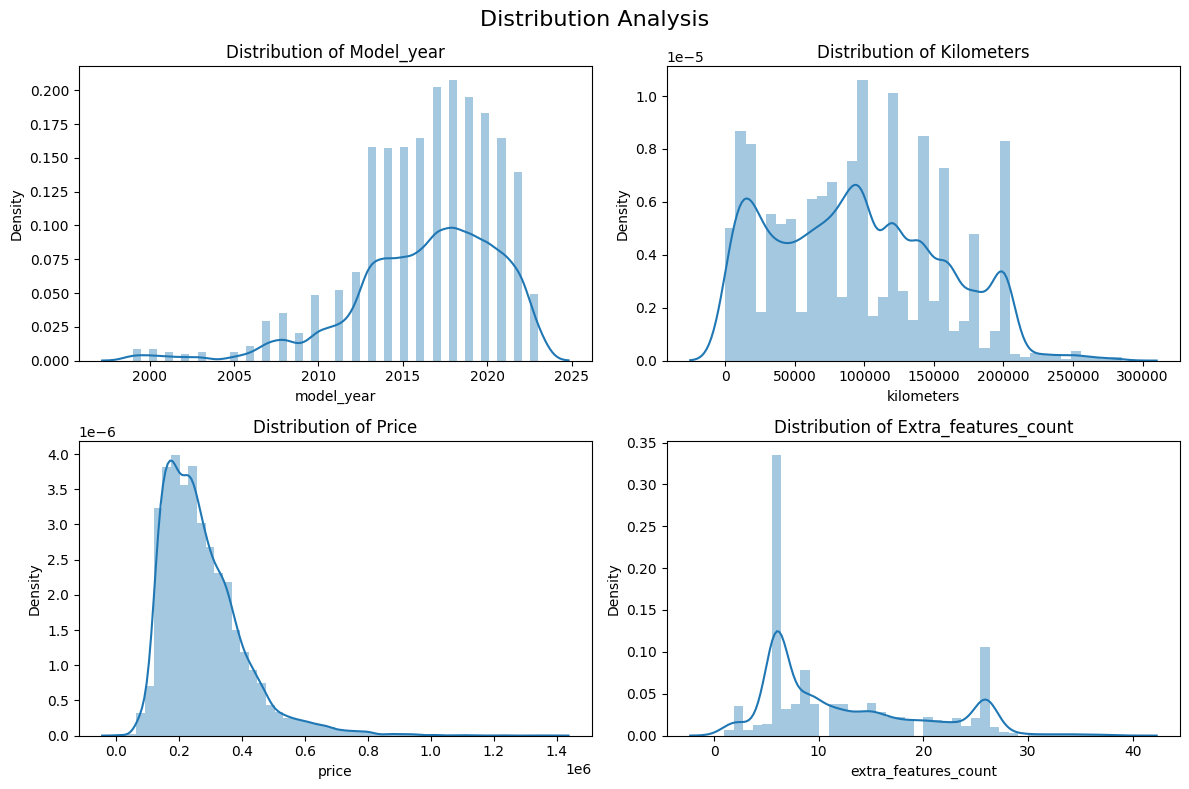

In [8]:
# Used to look at the distribution of a numerical variables
features_numeric = df.drop('id', axis=1).select_dtypes('number').columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = int(len(features_numeric) / 2) + len(features_numeric) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over features and plot distplot on subplots
for i, feature in enumerate(features_numeric):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.distplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')

# Remove empty subplots if necessary
if len(features_numeric) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Set title for the whole plot
fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
plt.savefig('../report/plots/numerical_distribution.jpg')
plt.show()

In [48]:
df[features_numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,18641.0,2016.377501,4.321064,1999.0,2014.0,2017.0,2020.0,2023.0
kilometers,18641.0,94673.422456,59974.665626,0.0,43000.0,90000.0,139999.0,285000.0
price,18641.0,274339.091250,128450.028610,10000.0,181000.0,248000.0,337000.0,1384000.0
extra_features_count,18641.0,12.451585,7.790864,1.0,6.0,9.0,18.0,39.0


Insights from this Dataset:
- There are skewness in {price, model_year, extra_features_count} features.
- The central tendency of extra_features are centered around [6-18], which means most of used cars have number of extra_features ranges from [6 - 18] features.
- The central tendency of model_year feature are centered around [2014 - 2020], which means most of used cars models are for years from [2014 - 2020].

### Categorical and binary features

#### What is the most common car model?

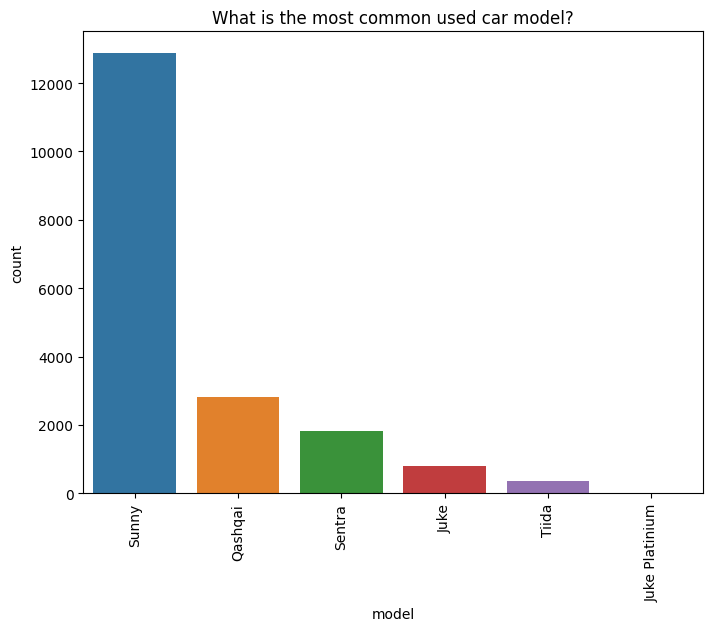

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='model', order=df.model.value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('What is the most common used car model?')
plt.savefig('../report/plots/model_countplot.jpg')
plt.show()

Insights:
- The most common used car model is Sunny, and the least common model is Juke Platinium.

### What is the most driven mileage in kilometers by used cars?

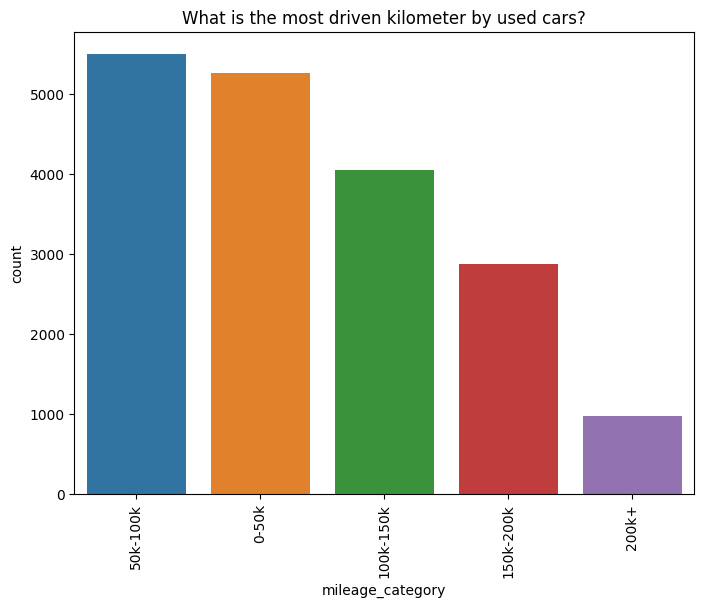

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mileage_category', order=df.mileage_category.value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('What is the most driven kilometer by used cars?')
plt.savefig('../report/plots/mileage_category_countplot.jpg')
plt.show()

Insights:
- Most of the cars we have, have driven around 0-150K.
- It is recommended that Most of sold used cars should be driven for around 0-150K.

#### What are the most common extra features in each car?

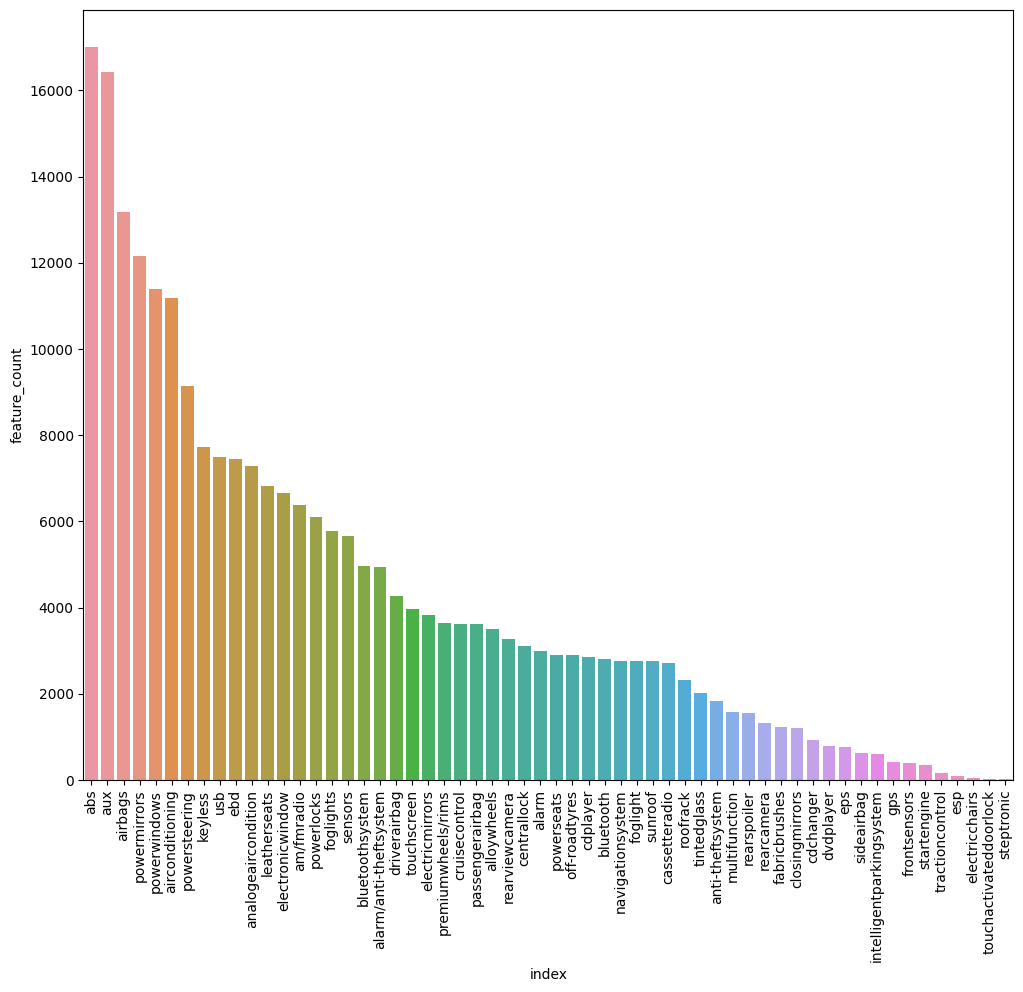

In [45]:
# What are the most common extra features in each car.
df_features_count = (
    df_extrafeatures
    .drop(['id', 'extra_features_lst', 'extra_features_count'], axis=1)
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='feature_count')
)

plt.figure(figsize=(12, 10))
sns.barplot(data=df_features_count, x='index', y='feature_count')
plt.xticks(rotation=90)
plt.savefig('../report/plots/features_countplot.jpg')
plt.show()

In [30]:
# Top ten most common features:
top_ten_common_features = df_features_count.head(10)['index'].values.tolist()
print(f'Top Ten Most Common Car Features:{top_ten_common_features}')

Top Ten Most Common Car Features:['abs', 'aux', 'airbags', 'powermirrors', 'powerwindows', 'airconditioning', 'powersteering', 'keyless', 'usb', 'ebd']


## Multivariate Analysis

### What is the frequency of models of used car over transmission types?

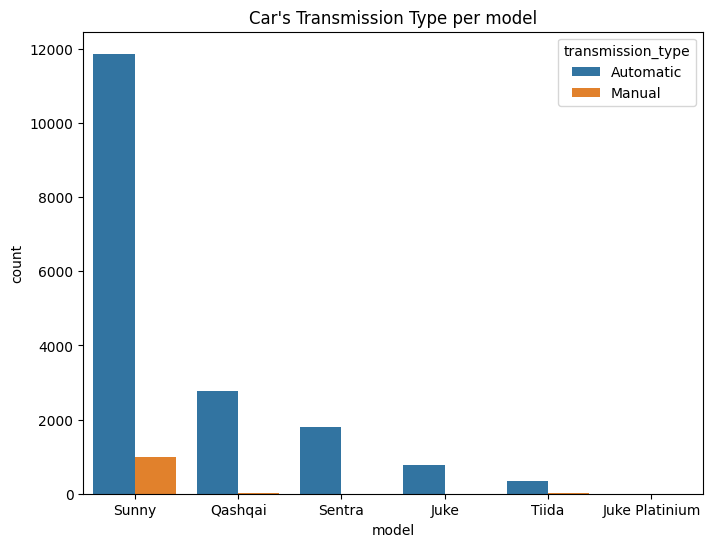

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='model', hue='transmission_type', order=df.model.value_counts(ascending=False).index)
plt.title("Car's Transmission Type per model")
plt.savefig('../report/plots/tranmission_per_model_countplot.jpg')
plt.show()

Insights:
- Most of the manual cars belongs to car model Sunny.
- As in this dataset, we have little number of Manual transmission_type.
- This will have some biasing while estimating the used car price in the machine learning or statistical model.

### Does Transmission type has effect on price?

<Axes: xlabel='priced_at', ylabel='price'>

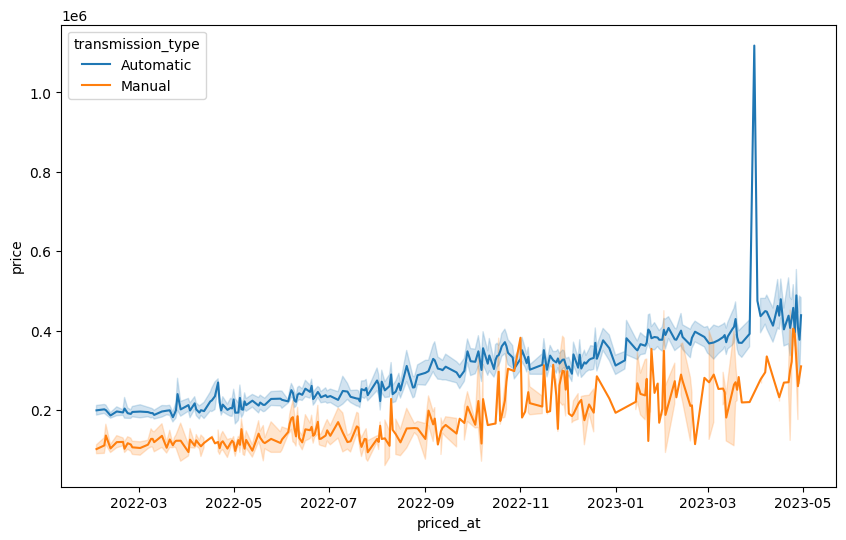

In [68]:
plt.figure(figsize=(10, 6))  # Set the desired figure size

# Does Transmission_type has effect on price?
fig = sns.lineplot(data=df, x='priced_at', y='price', hue='transmission_type')

# Save figure
#fig.get_figure().savefig('../report/plots/price_distribution_over_transmission_type.jpg')

fig

Insights:
- There are different between prices for manual vs automatic cars.
- This will have impact in estimating the used cars price.
- Although we have small amount of data regarding manual transmission type.

### How is the price trend accros other features?

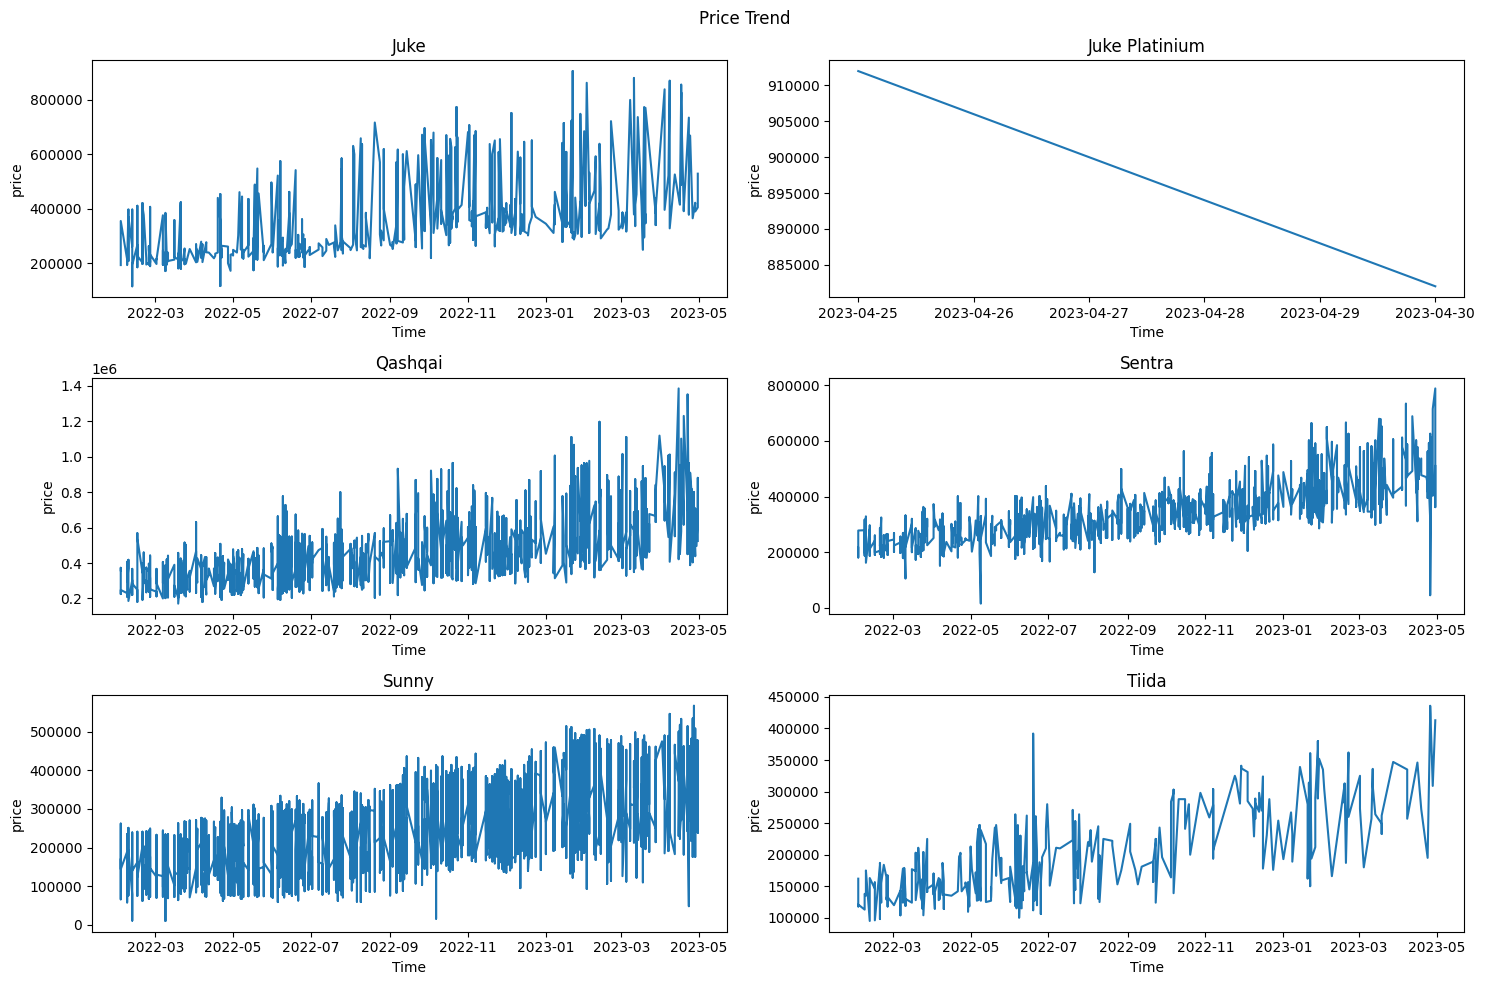

In [70]:
plot_timeseries_trend(
    df=df,
    timestamp_col='priced_at',
    target_col='price',
    groupby_lst=['model'],
    fig_title='Price Trend',
    save=False
)

Insights:
- There is a trend in the price over each used car model.
- There are a lot of noise in the price data.

### How does the price vary based on different car features such as car model, manufacturing year, and kilometers driven?

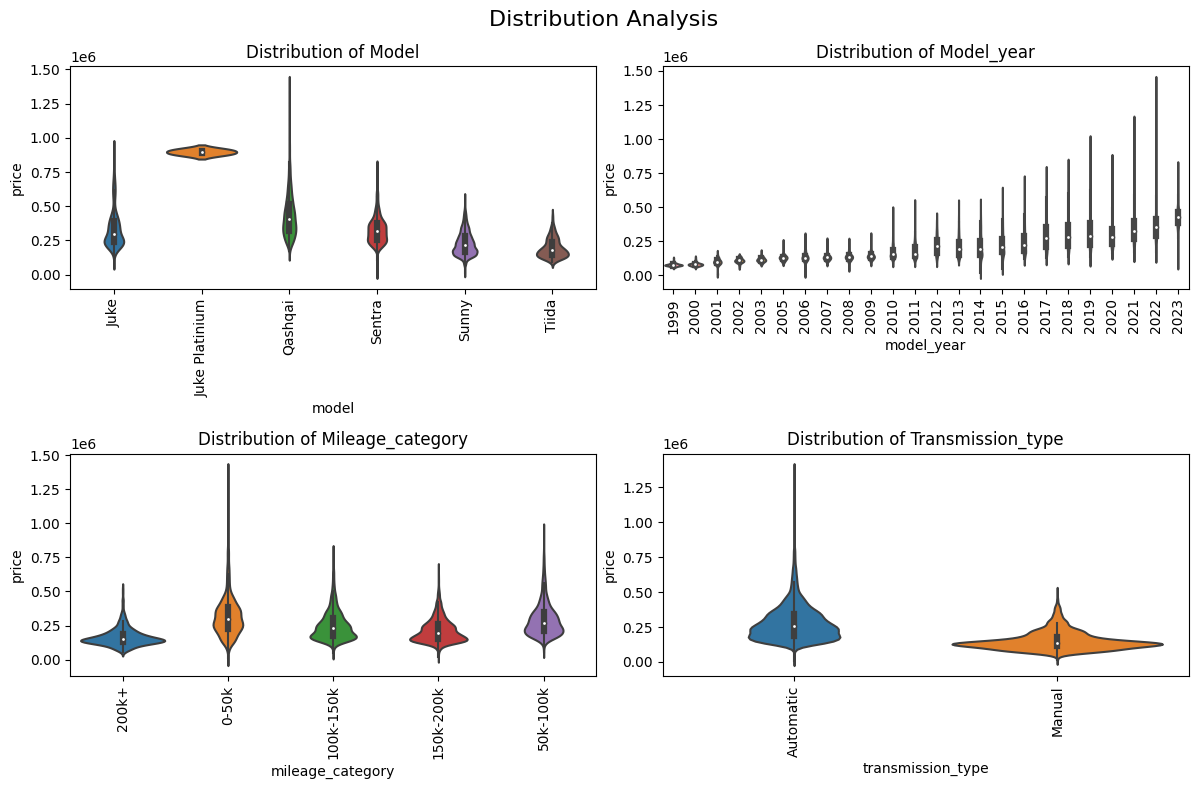

In [71]:
# Used to look at the distribution of a numerical variables
features_lst = ['model', 'model_year', 'mileage_category', 'transmission_type'] 

# Calculate the number of rows and columns for subplots
num_rows = int(len(features_lst) / 2) + len(features_lst) % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over features and plot distplot on subplots
for i, feature in enumerate(features_lst):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.violinplot(data=df, x=feature, y='price', ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.tick_params(axis='x', rotation=90)

# Remove empty subplots if necessary
if len(features_numeric) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Set title for the whole plot
fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
#plt.savefig('../report/plots/numerical_distribution.jpg')
plt.show()

To understand Violin plot, there are some aspects to consider:
| Aspect | Description|
|--------|------------|
|Distribution of Data| The width of the violin plot represents the density of data points at different price level. <br/>A wider section indicates a higher concentration of data points, which a narrower section indicates a lower concentration.|
|Median| The white dot within the violin plot represents the median value of the data distribution. <br/>It provides an estimate of the central tendency of the data.|
|Interquartile Range (IQR)| The box inside the violin plot represents the interquartile range, which spans from the 25th precentile (lower quartile) to the 75th precentile (upper quartile) of the data. <br/>It provides information about the spread and variability of the data.|
|Whiskers| The thin lines extending from the box (IQR) represents the data range within a certain threshould of the IQR. <br/>They typically cover a certain percentage of the data, such as 1.5 times the IQR. <br/>Any data points outside the whiskers are considered outliers.|
|Symmetry| The shape of the violin plot can provide insights into the symmetry or skewness of the data distribution. <br/>A symmetric distribution will have similar shapes on both sides of the median, while a skewed distribution will have a longer tail on one side.|

Insights:
- Using Violin plot tell us the following:

## Feature Engineering

### Car Age
- Describe the Age of car at the time of pricing.

In [5]:
# Car age at time the price was placed
df['model_age'] = df['priced_at'].dt.year - df['model_year']

# Dispaly head of df
df.head()

,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,0.0,14
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,0.0,14
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,0.0,13
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,0.0,12
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,8.0,11


### Price Moving Average.

In [7]:
# Price Moving Average
window_size = 3

df['price_moving_avg'] = (
    df.groupby('model')['price']
    .apply(
        lambda x: x.shift().rolling(window=window_size, min_periods=1).mean()
        )
    .fillna(method='bfill')
    .astype(int)
)

# Display head of dataframe
df.head()

/tmp/ipykernel_123842/3046543938.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('model')['price']


,id,make,model,model_year,kilometers,transmission_type,price,priced_at,mileage_category,extra_features_count,model_age,price_moving_avg
0,17786,Nissan,Juke,2008,200000.0,Automatic,115000,2022-02-11,200k+,0.0,14,115000
1,9997,Nissan,Juke,2008,200000.0,Automatic,116000,2022-04-21,200k+,0.0,14,115000
2,8738,Nissan,Juke,2009,19999.0,Automatic,239000,2022-06-01,0-50k,0.0,13,115500
3,9477,Nissan,Juke,2010,115000.0,Automatic,195000,2022-02-07,100k-150k,0.0,12,156666
4,12801,Nissan,Juke,2011,19279.0,Automatic,248000,2022-06-29,0-50k,8.0,11,183333
